# Анализ эффективности маркетинга развлекательного приложения Procrastinate Pro+

# Описание проекта
Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- Лог сервера с данными об их посещениях
- Выгрузка их покупок за этот период
- Рекламные расходы

Вам предстоит изучить:
- Откуда приходят пользователи и какими устройствами они пользуются
- Сколько стоит привлечение пользователей из различных рекламных каналов
- Сколько денег приносит каждый клиент
- Когда расходы на привлечение клиента окупаются
- Какие факторы мешают привлечению клиентов

# Описание данных

В вашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя
- Region — страна пользователя
- Device — тип устройства пользователя
- Channel — идентификатор источника перехода
- Session Start — дата и время начала сессии
- Session End — дата и время окончания сессии

Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя
- Event Dt — дата и время покупки
- Revenue — сумма заказа

Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании
- Channel — идентификатор рекламного источника
- costs — расходы на эту кампанию

<br><b>Цели исследования</b>:
- Выяснить откуда приходят пользователи и какими устройствами они пользуются
- Рассчитать стоимость привлечения пользователей для каждого рекламного канала
- Вычислить сумму денег, которую приносит каждый клиент
- Найти через какое время после привлечения клиента расходы на его привлечение окупаются
- Обнаружить факторы, мешающие привлечению клиентов
- Выявить причины неэффективности привлечения пользователей
- Сформулировать рекомендации отделу маркетинга

<br><b>Ход исследования</b>:
- Обзор и изучение данных
- Предобработка данных
- Создание функции для расчёта и анализа LTV, ROI, удержания и конверсии
- Исследовательский анализ данных
- Анализ маркетинга
- Расчёт окупаемости рекламы
- Вывод

## Изучение общей информации о файле 

### Импорт библиотек и изучение данных

In [1]:
import pandas as pd # импортируем библиотеку 'pandas'
import numpy as np # импортируем библиотеку 'numpy'
from datetime import datetime, timedelta # импортируем из библиотеки 'datetime' модули 'datetime' и 'timedelta'
from matplotlib import pyplot as plt # импортируем из библиотеки 'matplotlib' модуль 'pyplot'

# прочитаем csv файлы и добавим обработчик ошибок в случае неудачного чтения файла
visits, orders, costs = (pd.read_csv('visits_info_short.csv'), # посещения сайта
                             pd.read_csv('orders_info_short.csv'), # заказы
                             pd.read_csv('costs_info_short.csv') # рекламные расходы
)
pd.set_option('display.max_columns', None) # уберём ограничение на вывод столбцов на экран

In [2]:
# выведем 5 строк таблиц на экран
print('Таблица "visits"')
display(visits.head())
print('Таблица "orders"')
display(orders.head())
print('Таблица "costs"')
display(costs.head())

Таблица "visits"


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


Таблица "orders"


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


Таблица "costs"


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [3]:
# изучим общую информацию о данных
print('Таблица "visits"')
visits.info(verbose=True)
print()
print('Таблица "orders"')
orders.info(verbose=True)
print()
print('Таблица "costs"')
costs.info(verbose=True)

Таблица "visits"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

Таблица "orders"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

Таблица "costs"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to

### Поиск и обработка пропусков

Пропусков в таблицах нет.

### Преобразование типов данных
<br>Приведём названия столбцов к стилю "snake_case".

In [4]:
# приведём названия столбцов к нижнему регистру
visits.columns = visits.columns.str.lower()
orders.columns = orders.columns.str.lower()
costs.columns = costs.columns.str.lower()

In [5]:
# заменим пробел на знак '_' в названиях столбцов
visits.columns = visits.columns.str.replace(" ", "_")
orders.columns = orders.columns.str.replace(" ", "_")
costs.columns = costs.columns.str.replace(" ", "_")

В таблице "visits" столбцы "session_start" и "session_end" имеют неправильный формат object.
<br>В таблице "orders" столбец "event_dt" имеет неправильный формат object.
<br>В таблице "costs" столбец "dt" имеет неправильный формат object.
<br>Изменим формат в данных столбцах на корректный.

In [6]:
# изменим тип данных в столбцах на время
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [7]:
# проверим поменялись ли типы данных
print('Таблица "visits"')
visits.info(verbose=True)
print()
print('Таблица "orders"')
orders.info(verbose=True)
print()
print('Таблица "costs"')
costs.info(verbose=True)

Таблица "visits"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB

Таблица "orders"
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), floa

Типы данных в столбцах "session_start", "session_end", "event_dt" и "dt" изменены на корректные.

### Поиск и обработка явных и неявных дубликатов

In [8]:
# поиск явных дубликатов
print(visits.duplicated().sum(), orders.duplicated().sum(), costs.duplicated().sum())

0 0 0


In [9]:
# посмотрим уникальные значения по столбцам, где возможны неявные дубликаты
print(visits['region'].sort_values().unique())
print(visits['device'].sort_values().unique())
print(visits['channel'].sort_values().unique())
print(costs['channel'].sort_values().unique())

['France' 'Germany' 'UK' 'United States']
['Android' 'Mac' 'PC' 'iPhone']
['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds'
 'organic']
['AdNonSense' 'FaceBoom' 'LeapBob' 'MediaTornado' 'OppleCreativeMedia'
 'RocketSuperAds' 'TipTop' 'WahooNetBanner' 'YRabbit' 'lambdaMediaAds']


Явных и неявных дубликатов не выявлено.

### Поиск и обработка аномалий

In [10]:
# выведем статистические показатели по данным в таблицах на экран
print('Таблица "orders"')
display(orders.describe())
print('Таблица "costs"')
costs.describe()

Таблица "orders"


,user_id,revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


Таблица "costs"


,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


Аномалий не выявлено.

## Создание функций для расчёта и анализа LTV, ROI, удержания и конверсии

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей
- `get_retention()` — для подсчёта Retention Rate
- `get_conversion()` — для подсчёта конверсии
- `get_ltv()` — для подсчёта LTV

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных
- `plot_retention()` — для построения графика Retention Rate
- `plot_conversion()` — для построения графика конверсии
- `plot_ltv_roi` — для визуализации LTV и ROI

### Функция get_profiles() — для создания профилей пользователей

In [11]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names (данная часть функции нужна, если в датафрейме есть события,
    # по которым можно разделить пользователей на когорты)
    #for event in event_names:
        #if event in events['event_name'].unique():
            #profiles[event] = profiles['user_id'].isin(
                #events.query('event_name == @event')['user_id'].unique()
            #)

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Функция get_retention() — для подсчёта Retention Rate

In [12]:
# функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция get_conversion() — для подсчёта конверсии

In [13]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Функция get_ltv() — для подсчёта LTV и ROI.

In [14]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Функция filter_data() — для сглаживания данных

In [15]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Функция plot_retention() — для построения графика Retention Rate

In [16]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=1):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend(loc='upper right')
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend(loc='upper right')
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.legend(loc='upper right')
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.legend(loc='upper right')
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Функция plot_conversion() — для построения графика конверсии

In [17]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=1):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend(loc='upper right')
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.legend(loc='upper right')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Функция plot_ltv_roi — для визуализации LTV и ROI

In [18]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=1):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend(loc='upper right')
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.legend(loc='upper right')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.legend(loc='upper right')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(loc='upper right')
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend(loc='upper right')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [19]:
profiles = get_profiles(visits, orders, costs) # вызовем функцию 'get_profiles'
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [20]:
print(f'Минимальная дата привлечения пользователей: {profiles.first_ts.dt.date.min()}')
print(f'Максимальная дата привлечения пользователей: {profiles.first_ts.dt.date.max()}')

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


In [21]:
# создадим функцию для группировки датафрейма по определённому столбцу
def profiles_groupby(profiles, groupby):
    profiles_grouped = profiles.groupby([groupby]).agg({'user_id': 'nunique', 'payer': 'mean'})
    profiles_grouped.rename(columns={'payer': 'share_of_payers'}, inplace=True)
    profiles_grouped = (profiles_grouped.sort_values(by='share_of_payers', ascending=False)
                                        .style.format({'share_of_payers': "{:.2%}"})
                       )
    return profiles_grouped

In [22]:
profiles_groupby(profiles, 'region') # вызовем функцию 'profiles_groupby'

,user_id,share_of_payers
region,,
United States,100002,6.90%
Germany,14981,4.11%
UK,17575,3.98%
France,17450,3.80%


Всех больше пользователей в "United States" - 100 тысяч человек.
<br>Самая большая доля платящих пользователей в 6,9% также в регионе "United States".

In [23]:
profiles_groupby(profiles, 'device') # вызовем функцию 'profiles_groupby'

,user_id,share_of_payers
device,,
Mac,30042,6.36%
iPhone,54479,6.21%
Android,35032,5.85%
PC,30455,5.05%


Самая популярная платформа "iPhone" - 54 тысячи пользователей.
<br>Самая большая доля платящих пользователей в 6,36% используют "Mac".

In [24]:
profiles_groupby(profiles, 'channel') # вызовем функцию 'profiles_groupby'

,user_id,share_of_payers
channel,,
FaceBoom,29144,12.20%
AdNonSense,3880,11.34%
lambdaMediaAds,2149,10.47%
TipTop,19561,9.60%
RocketSuperAds,4448,7.91%
WahooNetBanner,8553,5.30%
YRabbit,4312,3.83%
MediaTornado,4364,3.57%
LeapBob,8553,3.06%


Всех больше пользователей приходит из канала "organic" - 56 тысяч человек. Это органические пользователи, которые нашли компанию без помощи рекламы.
<br>Всех больше пользователей из рекламного канала "FaceBoom" - 29 тысяч человек.
<br>Самая большая доля платящих пользователей в 12,2% с "FaceBoom".

## Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [25]:
round(costs['costs'].sum()) # посчитаем общую сумму расходов на маркетинг

105497

Общая сумма расходов на маркетинг с 1 мая по 27 октября 2019 г. составила 105497.

In [26]:
# сгруппируем датафрейм 'costs' по столбцу 'channel'
costs_channel = costs.groupby('channel').agg({'costs': 'sum'})
costs_channel.rename(columns={'costs': 'sum_costs'}, inplace=True)
(costs_channel.sort_values(by='sum_costs', ascending=False)
             .style.format({'sum_costs': '{:.1f}'})
             .background_gradient('coolwarm')
)

,sum_costs
channel,
TipTop,54751.3
FaceBoom,32445.6
WahooNetBanner,5151.0
AdNonSense,3911.2
OppleCreativeMedia,2151.2
RocketSuperAds,1833.0
LeapBob,1797.6
lambdaMediaAds,1557.6
MediaTornado,954.5


Самые большие маркетинговые расходы на рекламный канал "TipTop" составили 54751. Всех меньше расходов на "YRabbit" - 944.

<Figure size 2000x1000 with 0 Axes>

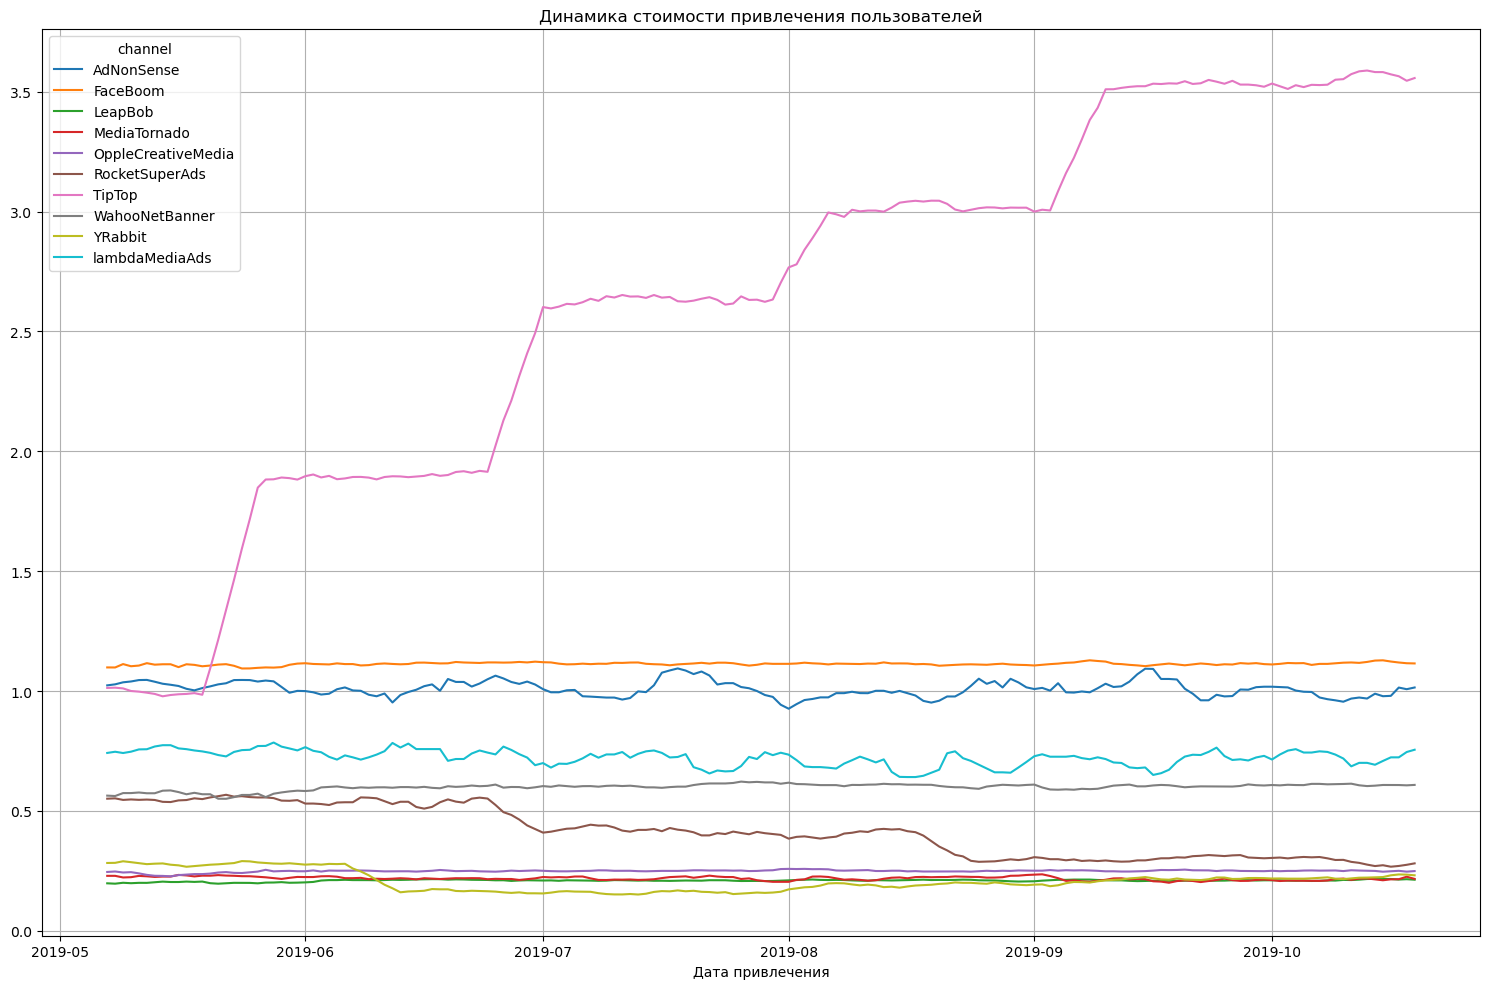

In [27]:
observation_date = datetime(2019, 11, 1).date() # момент анализа
horizon_days = 14 # горизонт анализа 

# смотрим динамику изменения расходов на привлечение пользователей во времени по рекламным каналам
dimensions = ['channel']

# функция для визуализации динамики CAC
def plot_cac_history(ltv, ltv_history, roi, roi_history, horizon, window=1):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # график — динамика cac
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, figsize=(15, 10))
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    plt.tight_layout()
    plt.show()

# вызовем функцию для расчёта LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

# вызовем функцию для построения графика динамики CAC
# зададим размер окна для скользящего среднего в 7 дней
plot_cac_history(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7)

По графику выше видно, что стоимость привлечения пользователей резко выросла у "TipTop", а у остальных рекламных каналов оставалась на одном уровне на протяжении 2019 г.

In [28]:
# сгруппируем датафрейм 'profiles' по столбцу 'channel'
profiles_cac_by_channel = profiles.groupby(['channel']).agg({'acquisition_cost': 'mean'})
profiles_cac_by_channel.rename(columns={'acquisition_cost': 'cac'}, inplace=True)
(profiles_cac_by_channel.sort_values(by='cac', ascending=False)
                        .style.format({'cac': '{:.2f}'})
                        .background_gradient('coolwarm')
)

,cac
channel,
TipTop,2.80
FaceBoom,1.11
AdNonSense,1.01
lambdaMediaAds,0.72
WahooNetBanner,0.60
RocketSuperAds,0.41
OppleCreativeMedia,0.25
YRabbit,0.22
MediaTornado,0.22


In [29]:
(profiles_cac_by_channel.query('channel != "organic"')
                        .describe()
) # посчитаем статистические показатели по данным в таблице 'profiles_cac_by_channel'

,cac
count,10.000000
mean,0.755735
std,0.791550
min,0.210172
25%,0.226731
50%,0.507170
75%,0.937241
max,2.799003


В среднем рекламные расходы на привлечение одного пользователя (CAC) составляют 0,76. Самые большие расходы на привлечение одного пользователя (CAC) у рекламного канала "TipTop" составили 2,8. Всех меньше расходов на привлечение одного пользователя (CAC) у "organic" - 0, так как за привлечение органических пользователей компания не платит. Если не учитывать "organic", то самые низкие расходы на привлечение одного пользователя (CAC) у рекламного канала "LeapBob" - 0,21.

## Расчёт окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### Расчёт конверсии пользователей

In [30]:
observation_date = datetime(2019, 11, 1).date() # момент анализа
horizon_days = 14 # горизонт анализа

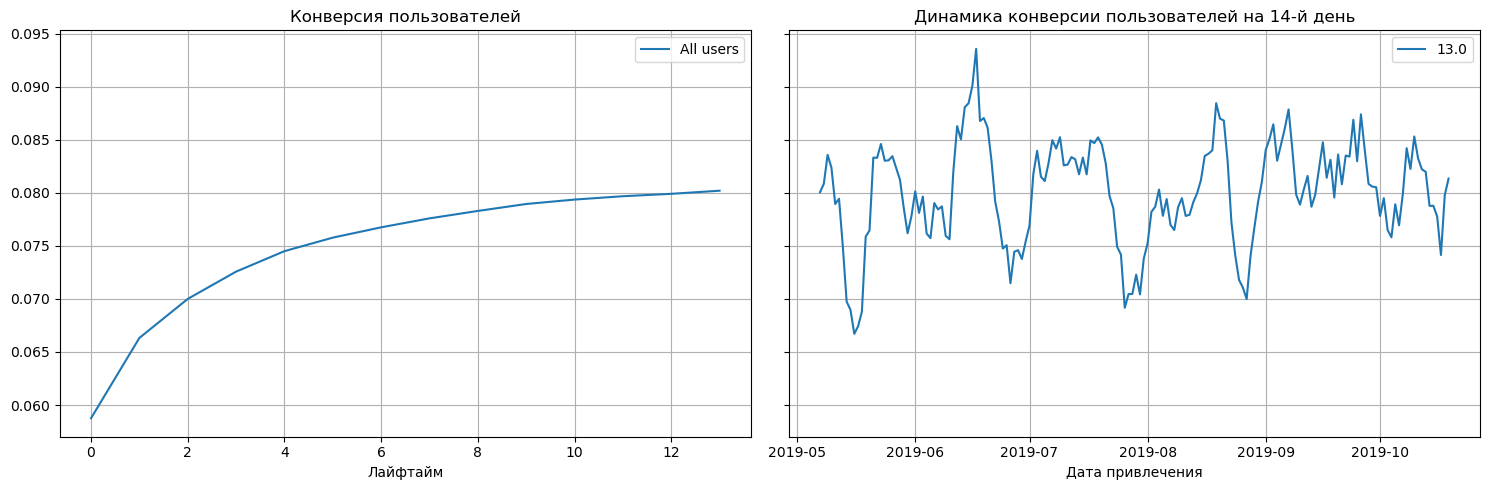

In [31]:
# вызовем функцию для расчёта конверсии
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=[]
)

# вызовем функцию для построения графиков конверсии
# зададим размер окна для скользящего среднего в 7 дней
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=7)

По графикам выше видно, что конверсия пользователей на 14-ый день составляет 8%. Данный показатель довольно низкий. Также конверсия пользователей на 14-ый день сильно варьируется в зависимости от когорты определённого дня.

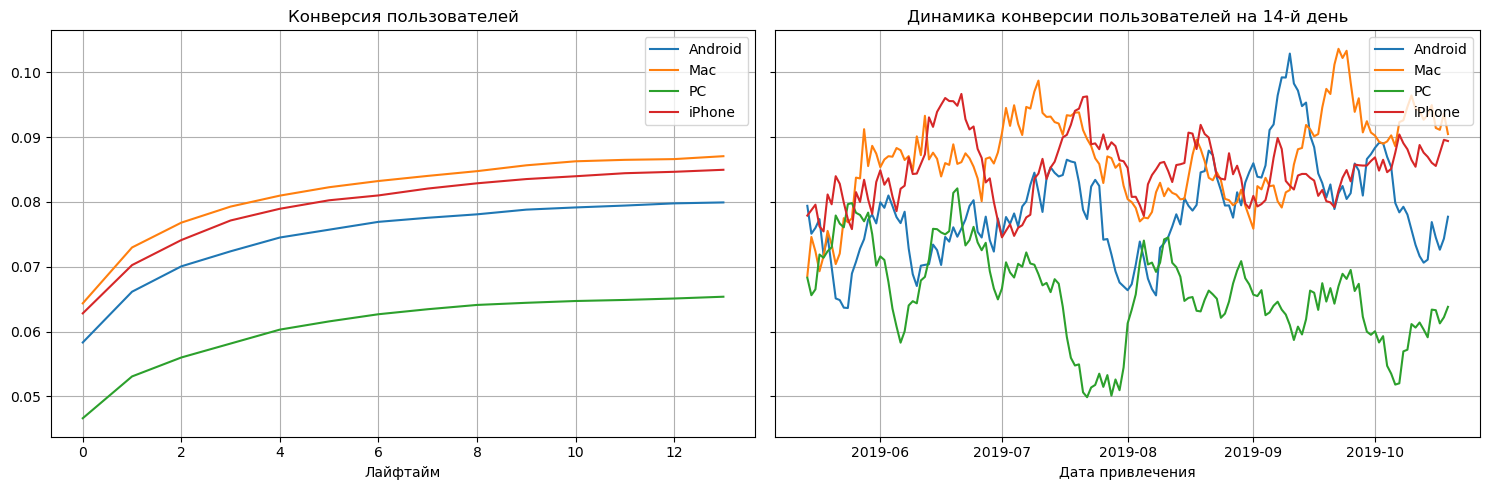

In [32]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

# вызовем функцию для построения графиков конверсии
# зададим размер окна для скользящего среднего в 14 дней
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14)

По графикам выше видно, что конверсия на 14-ый день всех больше у пользователей "Mac" и составляет почти 9%. У пользователей "PC" конверсия самая низкая и составляет 6,5%. Также конверсия пользователей на 14-ый день сильно варьируется в зависимости от когорты определённого дня у каждого устройства.

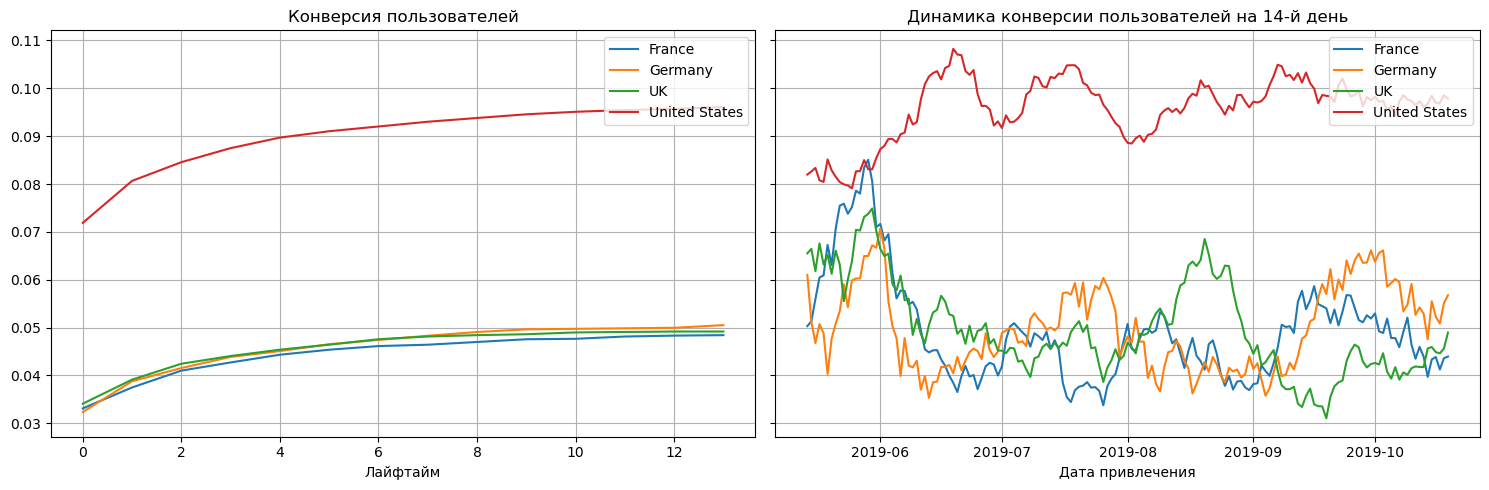

In [33]:
# смотрим конверсию с разбивкой по регионам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

# вызовем функцию для построения графиков конверсии
# зададим размер окна для скользящего среднего в 14 дней
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=14) 

По графикам выше видно, что конверсия на 14-ый день всех больше у пользователей из "United States" и составляет почти 10%. У пользователей из "France" конверсия самая низкая и составляет 5%. Также конверсия пользователей на 14-ый день сильно варьируется в зависимости от когорты определённого дня у каждого региона.

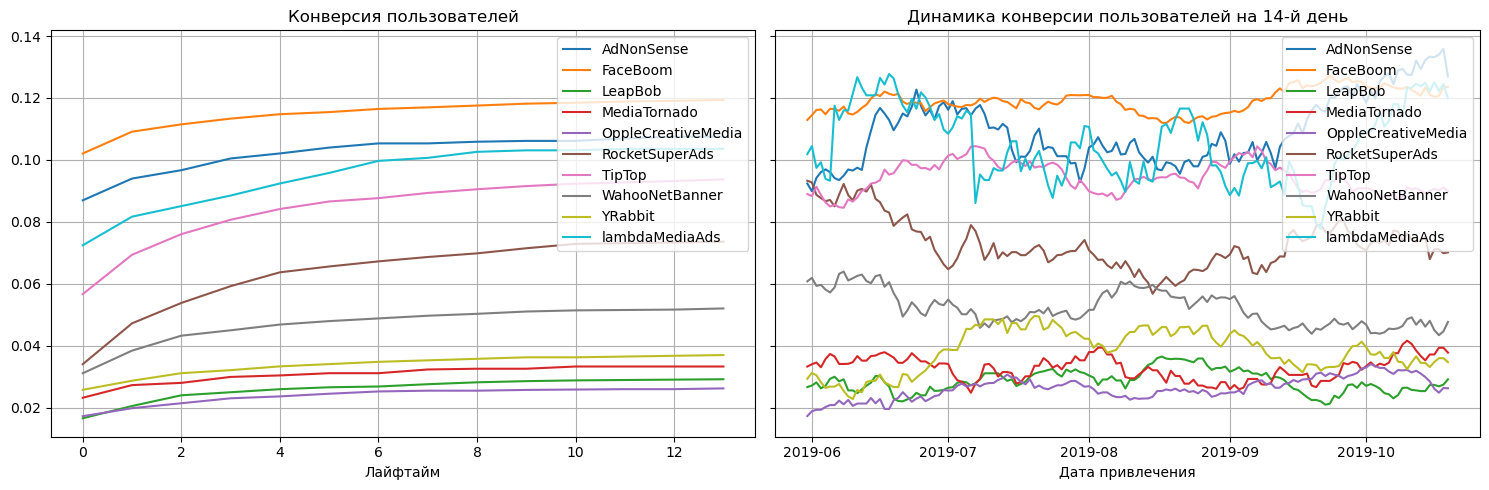

In [34]:
# смотрим конверсию с разбивкой по рекламным каналам
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

# вызовем функцию для построения графиков конверсии
# зададим размер окна для скользящего среднего в 31 день
plot_conversion(conversion_grouped, conversion_history, horizon_days, window=31) 

По графикам выше видно, что конверсия на 14-ый день всех больше у пользователей, привлечённых из "FaceBoom" и составляет 12%. У пользователей, привлечённых из "OppleCreativeMedia" конверсия самая низкая и составляет чуть больше 2%. Также конверсия пользователей на 14-ый день сильно варьируется в зависимости от когорты определённого дня у каждого рекламного канала.

### Расчёт удержания пользователей

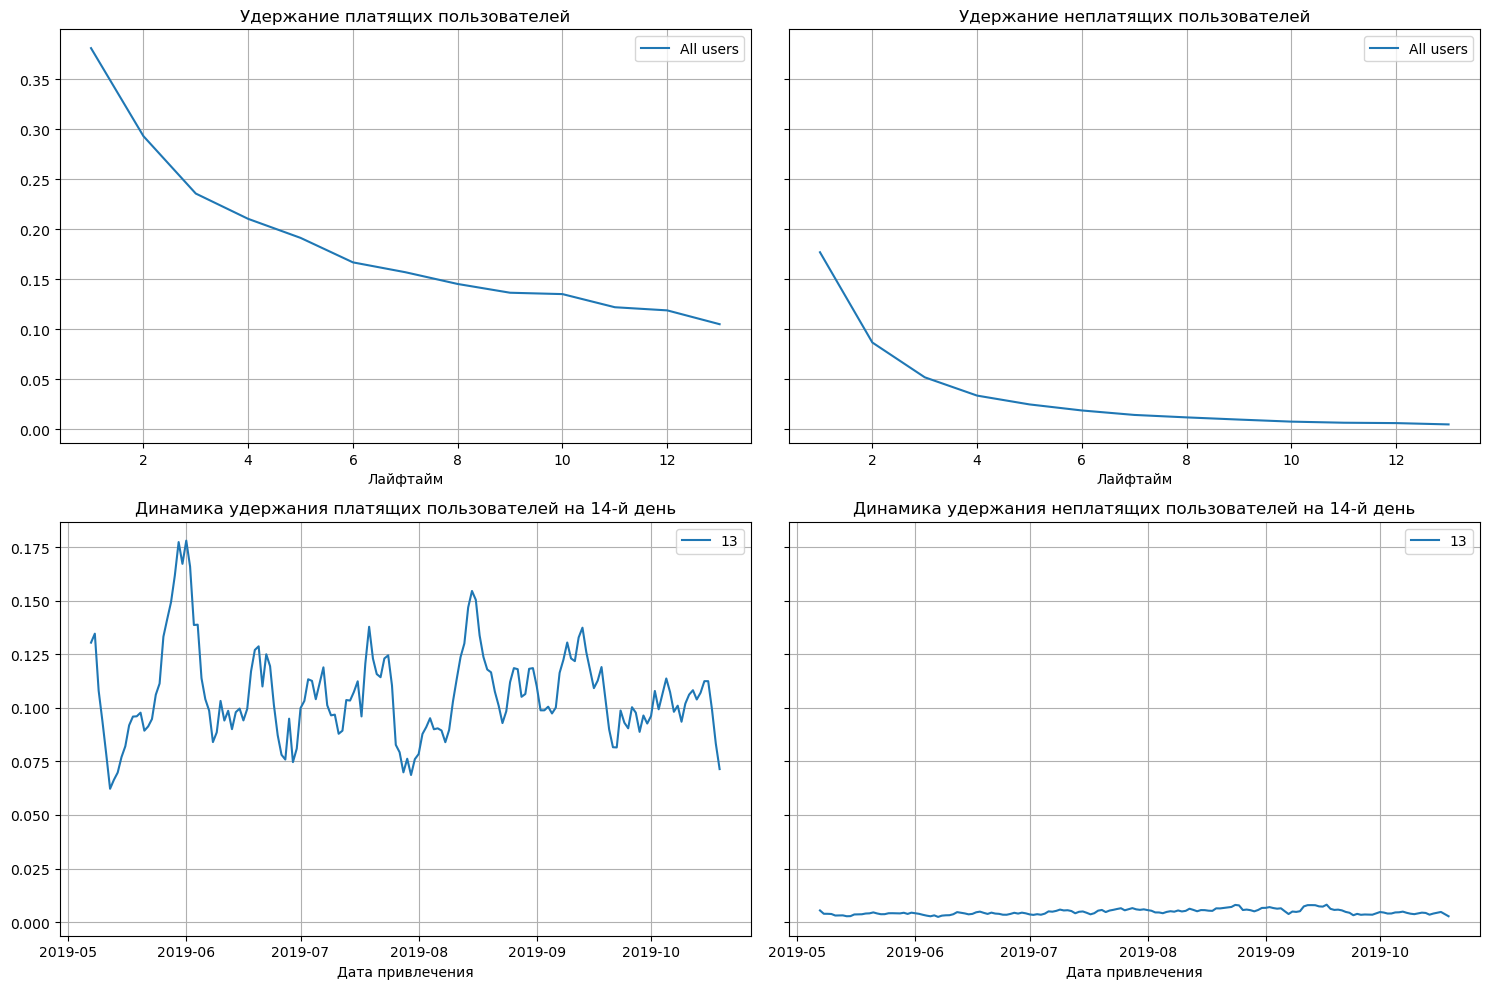

In [35]:
# вызовем функцию для расчёта удержания
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days
)

# вызовем функцию для построения графиков удержания
# зададим размер окна для скользящего среднего в 7 дней
plot_retention(retention_grouped, retention_history, horizon_days, window=7)

По графикам выше видно, что удержание платящих пользователей на 14-ый день составляет довольно низкие 10%. Удержание неплатящих пользователей на 14-ый день составляет критически низкий 1%. Динамика удержания платящих пользователей на 14-ый день сильно варьируется в зависимости от когорты определённого дня. Динамика удержания неплатящих пользователей на 14-ый день неизменна.

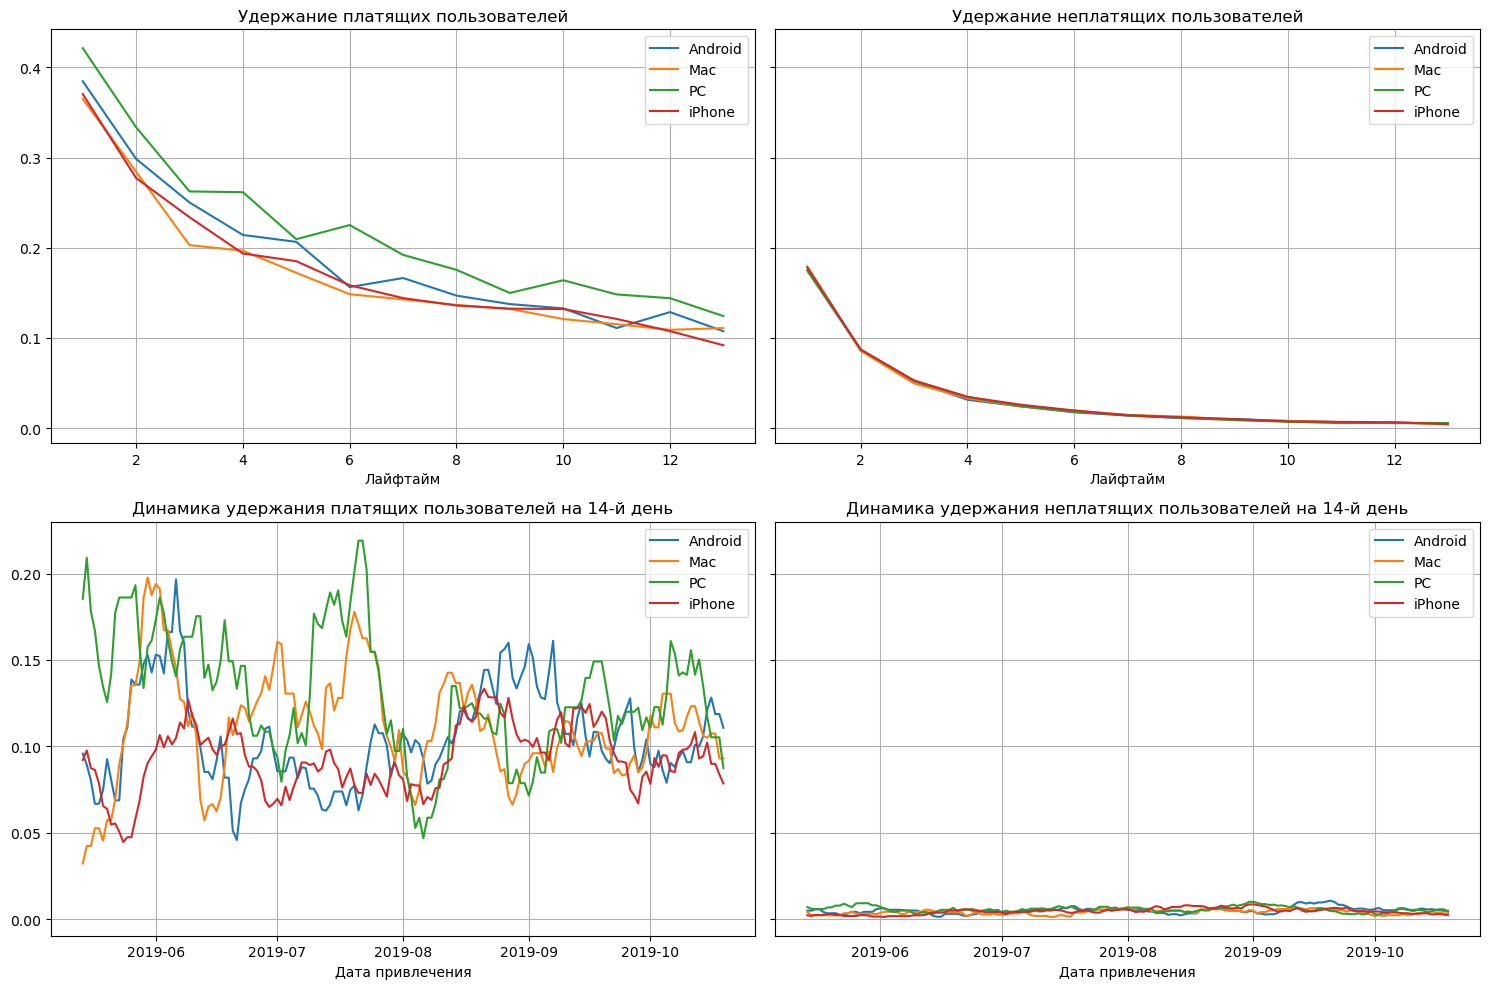

In [36]:
# вызовем функцию для расчёта удержания с разбивкой по устройствам
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=dimensions
)

# вызовем функцию для построения графиков удержания
# зададим размер окна для скользящего среднего в 14 дней
plot_retention(retention_grouped, retention_history, horizon_days, window=14)

По графикам выше видно, что удержание платящих пользователей на 14-ый день всех выше на "PC" и составляет 13%, всех ниже на "iPhone" - почти 10%. Удержание неплатящих пользователей на 14-ый день составляет критически низкий 1% на всех устройствах. Динамика удержания платящих пользователей на 14-ый день сильно варьируется в зависимости от когорты определённого дня на каждом устройстве. Динамика удержания неплатящих пользователей на 14-ый день неизменна на каждом устройстве.

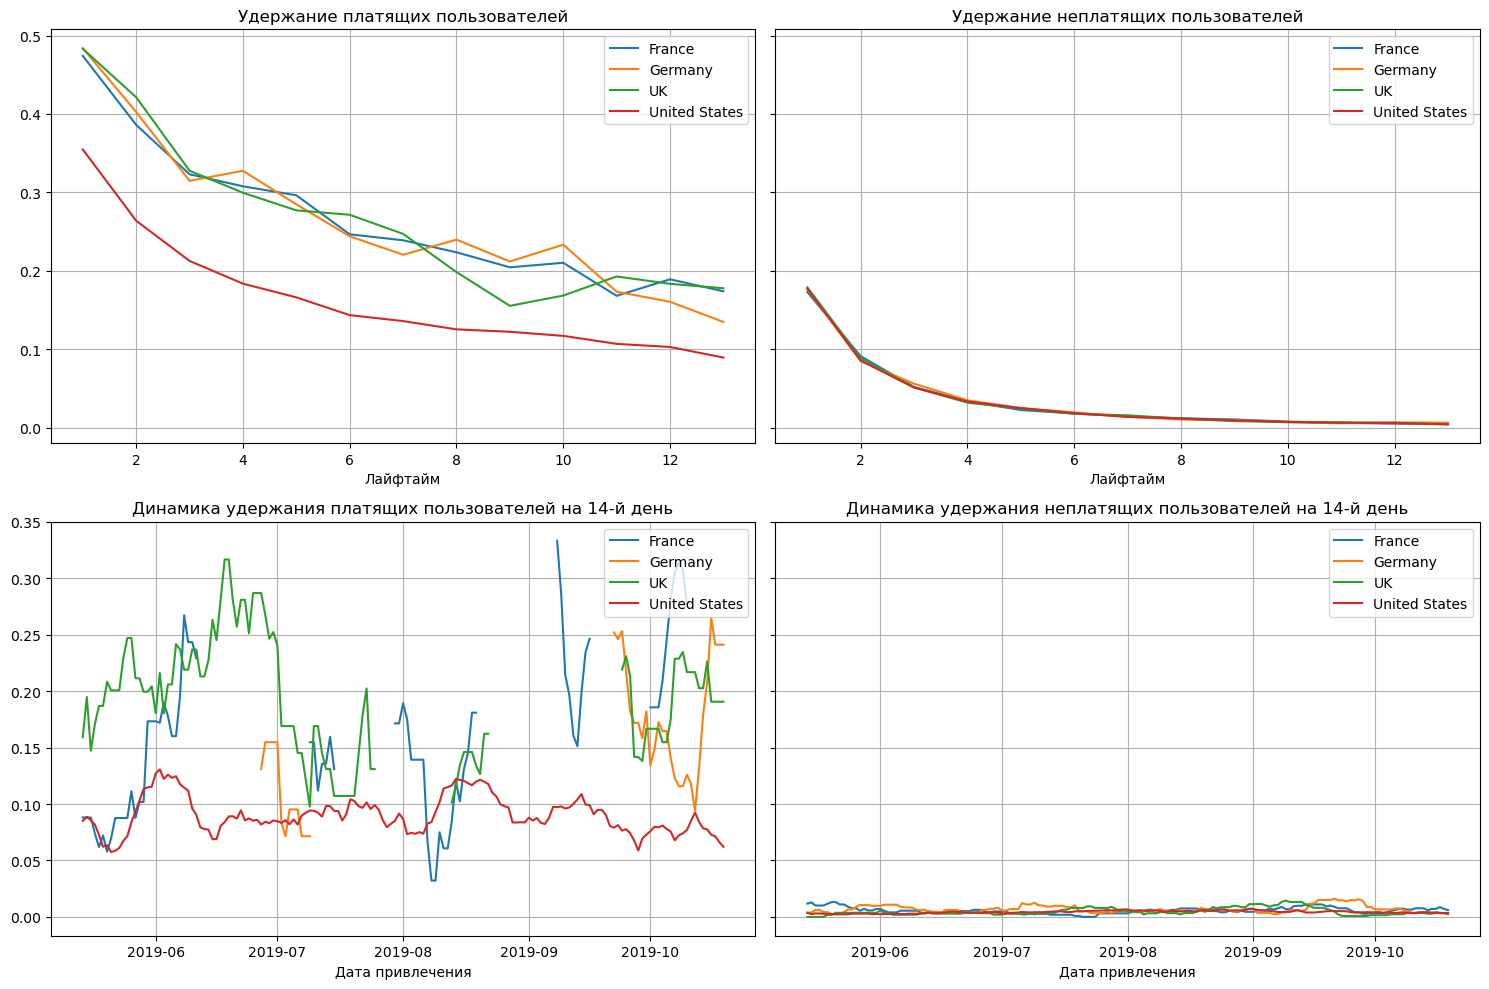

In [37]:
# вызовем функцию для расчёта удержания с разбивкой по регионам
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=dimensions
)

# вызовем функцию для построения графиков удержания
# зададим размер окна для скользящего среднего в 14 дней
plot_retention(retention_grouped, retention_history, horizon_days, window=14)

По графикам выше видно, что удержание платящих пользователей на 14-ый день всех выше в "UK" и составляет 18%, всех ниже в "United States" - 10%. Удержание неплатящих пользователей на 14-ый день составляет критически низкий 1% во всех регионах. Динамика удержания платящих пользователей на 14-ый день сильно варьируется в зависимости от когорты определённого дня в каждом регионе. Динамика удержания неплатящих пользователей на 14-ый день неизменна в каждом регионе.

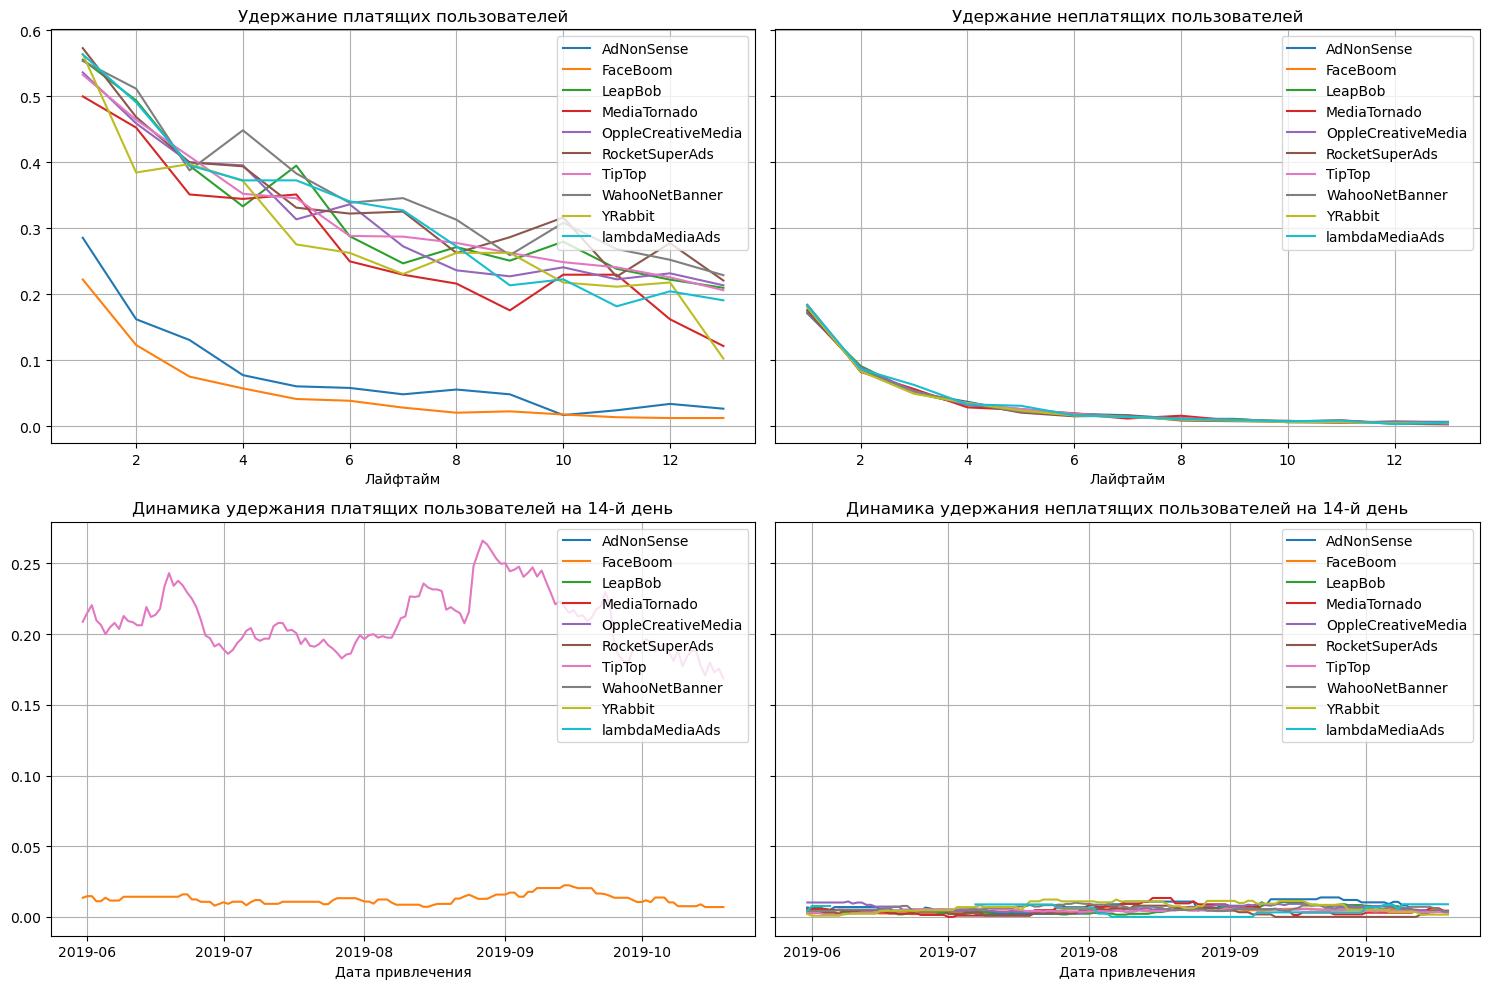

In [38]:
# вызовем функцию для расчёта удержания с разбивкой по рекламным каналам
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('channel != "organic"'), visits, observation_date, horizon_days, dimensions=dimensions
)

# вызовем функцию для построения графиков удержания
# зададим размер окна для скользящего среднего в 31 день
plot_retention(retention_grouped, retention_history, horizon_days, window=31)

По графикам выше видно, что удержание платящих пользователей на 14-ый день всех выше у "WahooNetBanner" и составляет 24%, всех ниже у "FaceBoom" - 1%. Удержание неплатящих пользователей на 14-ый день составляет критически низкий 1% у всех рекламных каналов. Динамика удержания платящих пользователей на 14-ый день сильно варьируется в зависимости от когорты определённого дня у каждого рекламного канала. Динамика удержания неплатящих пользователей на 14-ый день неизменна у каждого рекламного канала.

### Расчёт LTV, CAC и ROI

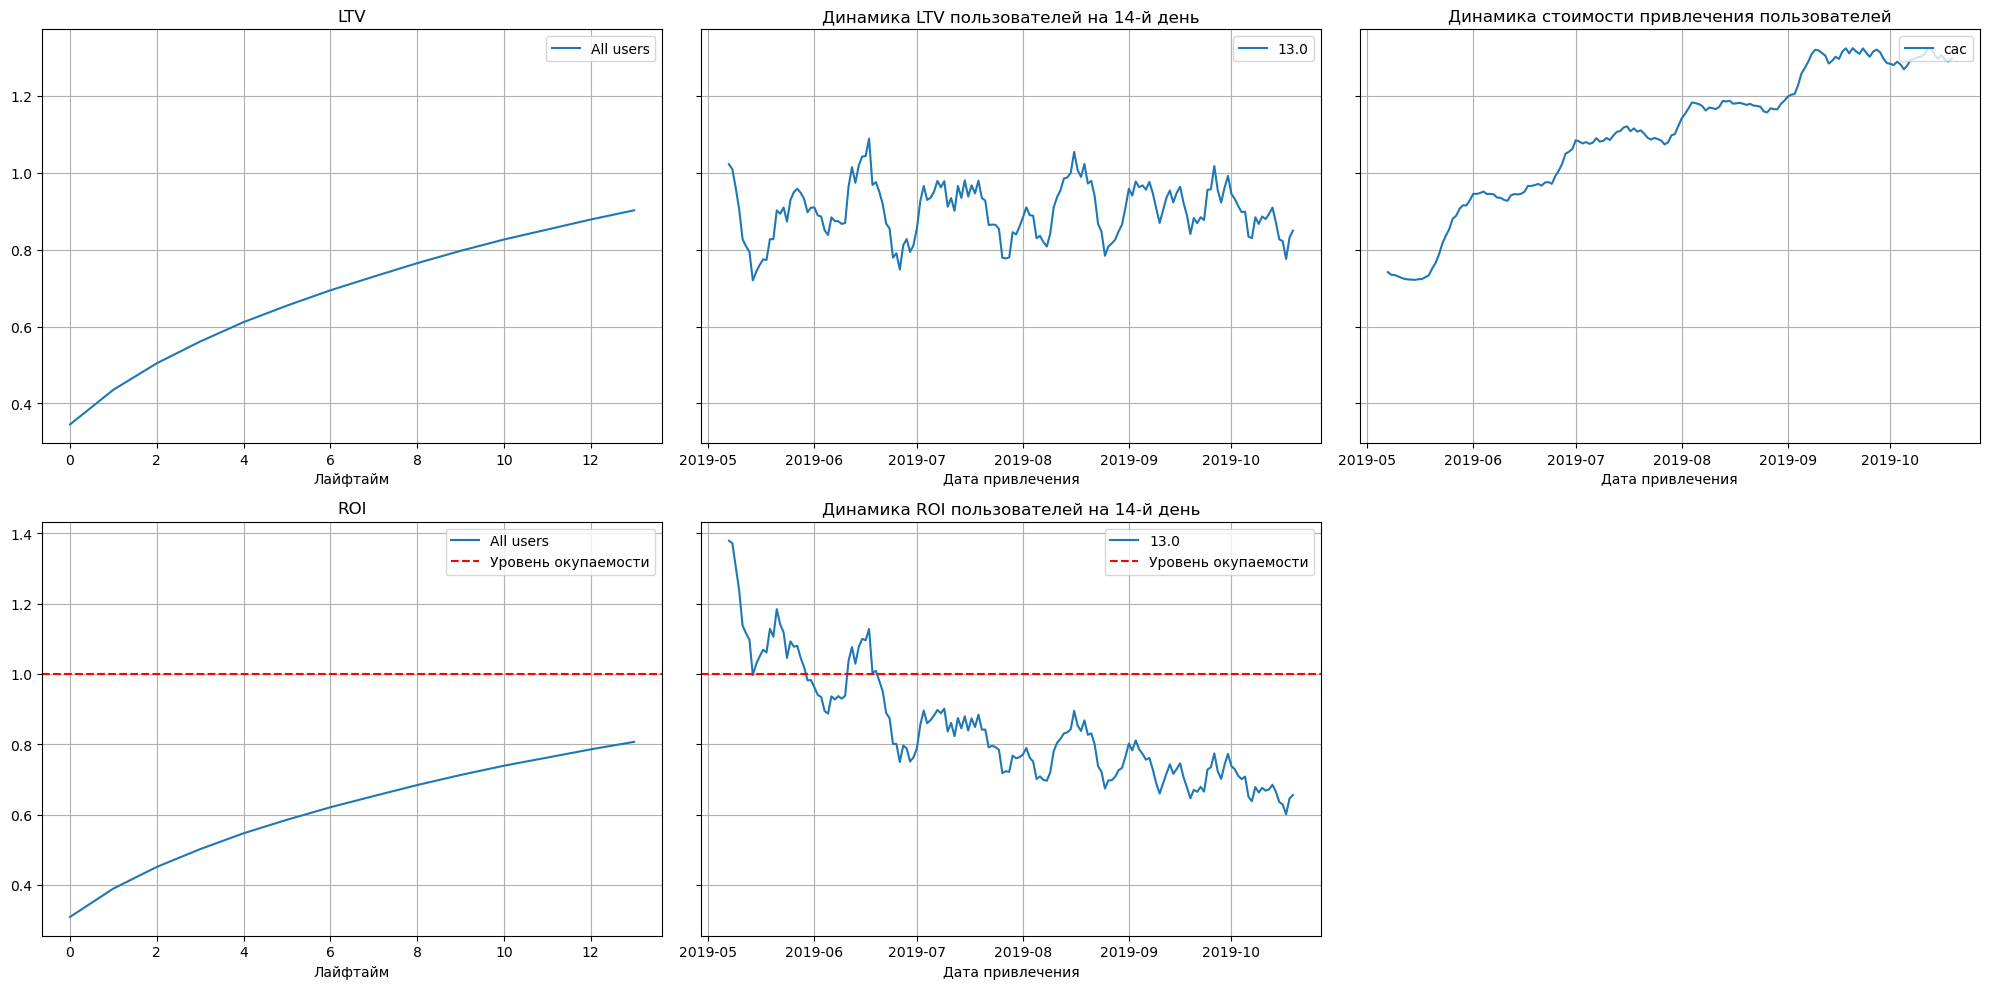

In [39]:
# вызовем функцию для расчёта LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days
)

# вызовем функцию для построения графиков LTV и ROI
# зададим размер окна для скользящего среднего в 7 дней
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=7) 

По графикам выше видно, что LTV пользователей на 14-ый день составляет 0,9. Также LTV пользователей на 14-ый день сильно варьируется в зависимости от когорты определённого дня. Стоимость привлечения пользователей растёт. ROI на 14-ый день ниже 100% - рекламная кампания не окупается. Также ROI пользователей на 14-ый день постепенно снижается и рекламная кампания перестаёт окупаться в середине июня 2019 г.

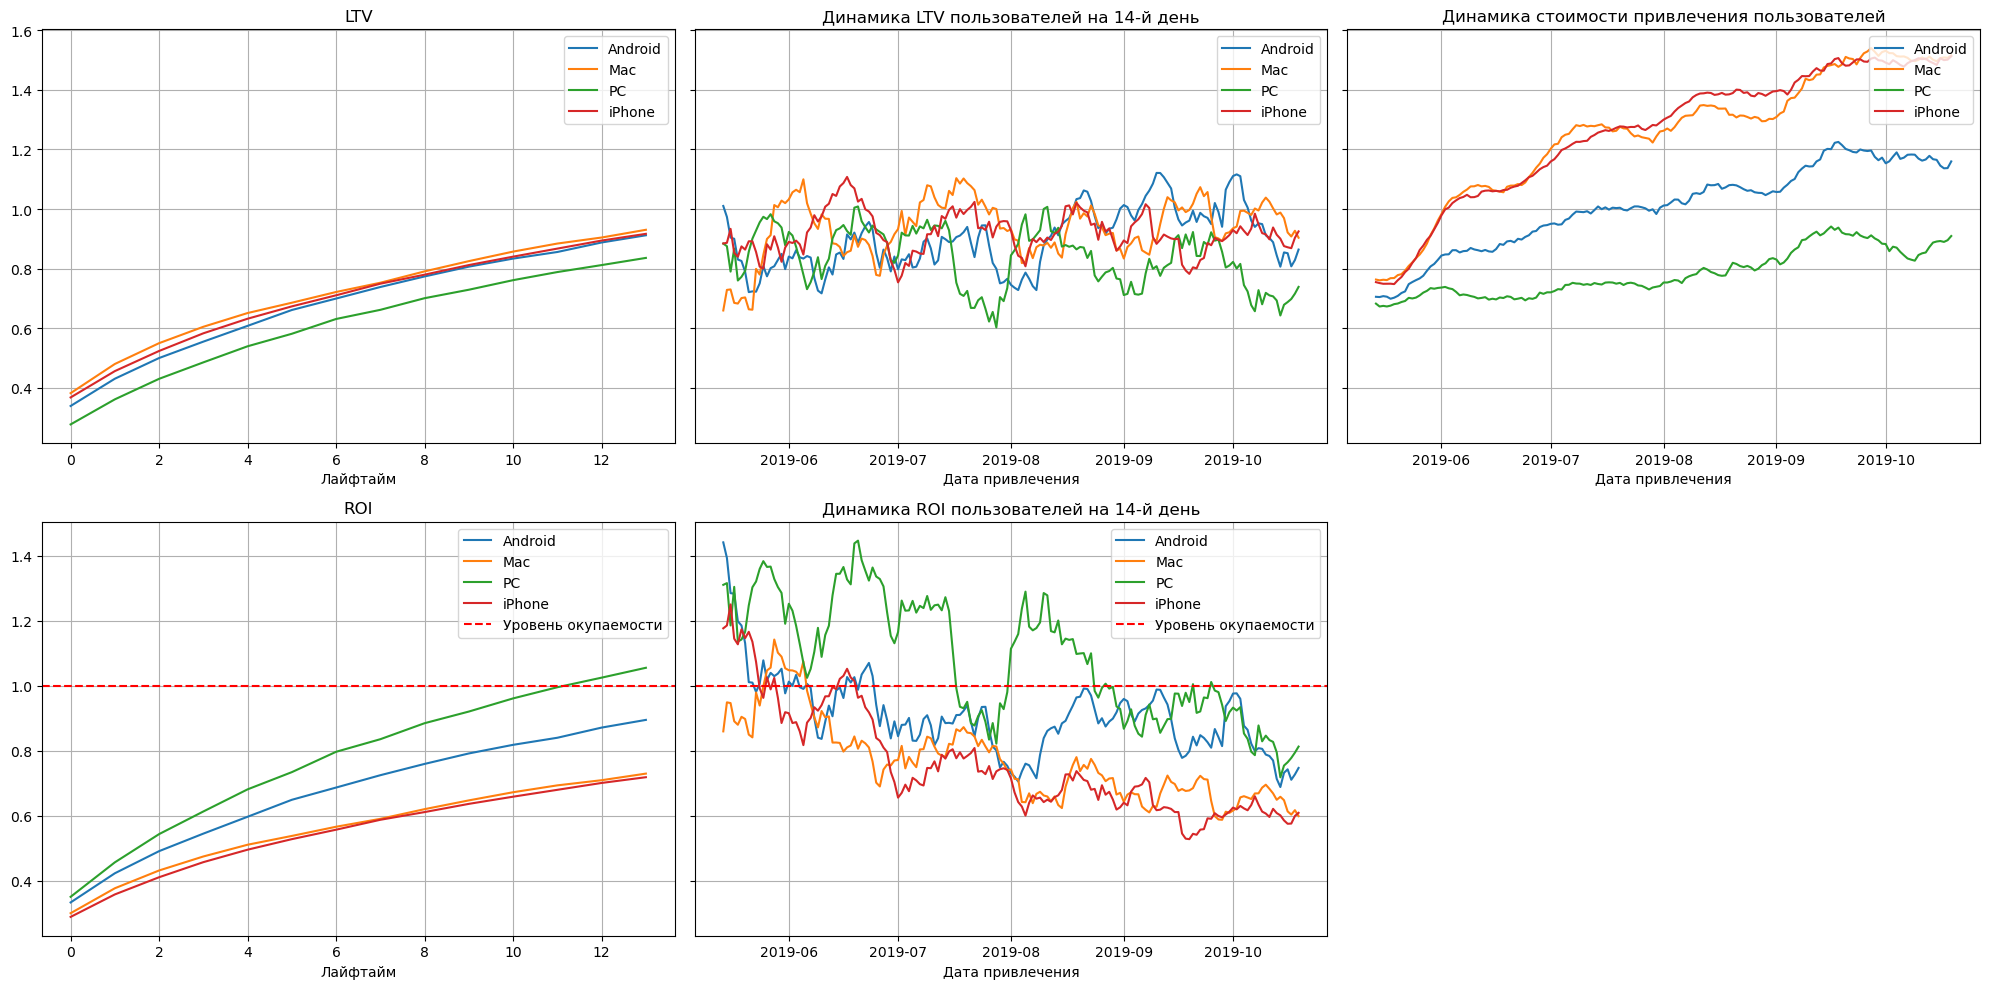

In [40]:
# смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

# вызовем функцию для построения графиков LTV и ROI
# зададим размер окна для скользящего среднего в 14 дней
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

По графикам выше видно, что LTV пользователей на 14-ый день составляет 0,9 у всех устройств, кроме "PC". Также LTV пользователей на 14-ый день сильно варьируется в зависимости от когорты определённого дня у каждого устройства. Стоимость привлечения пользователей стремительнее растёт на "iPhone" и "Mac", чем на других устройствах. ROI на 14-ый день выше 100% у пользователей "PC" - рекламная кампания окупается, на остальных устройствах - не окупается. Также ROI пользователей на 14-ый день постепенно снижается на всех устройствах и рекламная кампания перестаёт окупаться в конце июня 2019 г. у всех, кроме "PC".

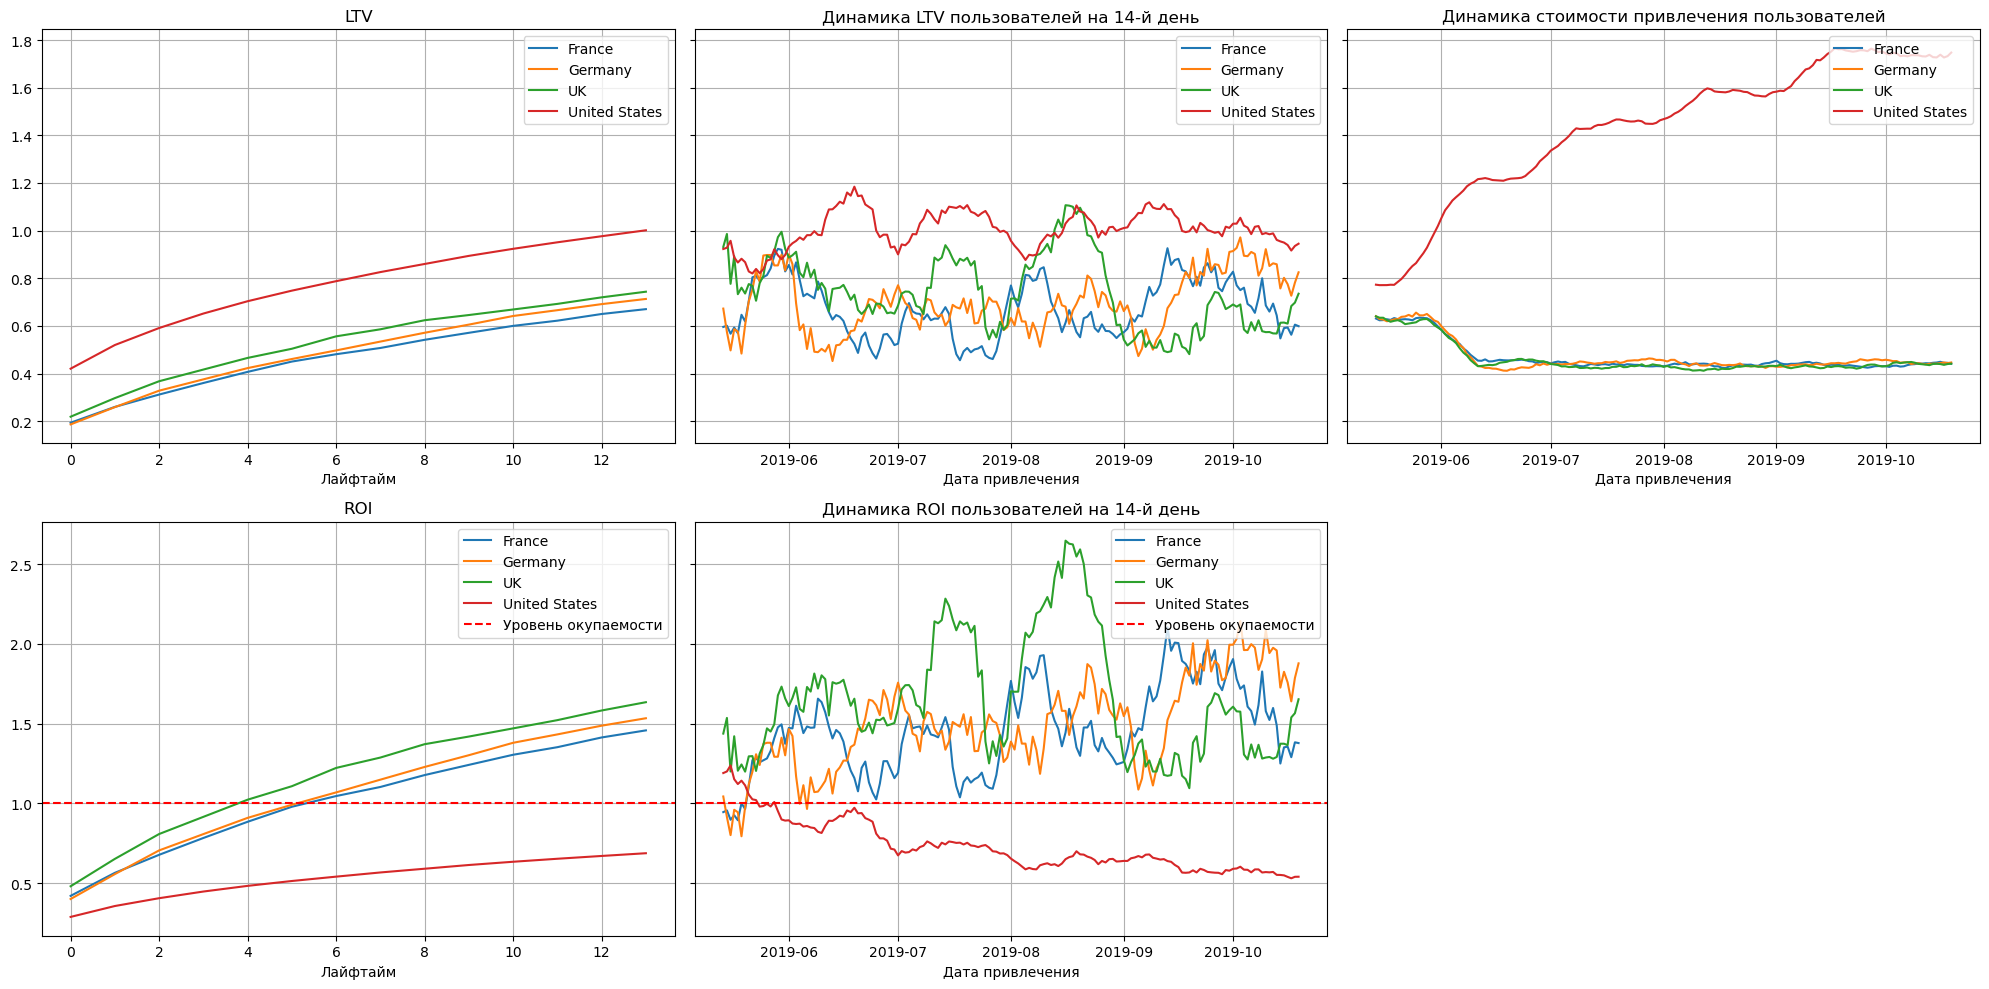

In [41]:
# смотрим окупаемость с разбивкой по регионам
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

# вызовем функцию для построения графиков LTV и ROI
# зададим размер окна для скользящего среднего в 14 дней
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

По графикам выше видно, что LTV на 14-ый день всех больше у пользователей из "United States" и составляет 1, самый низкий показатель у пользователей из "France" - почти 0.7. Также LTV пользователей на 14-ый день сильно варьируется в зависимости от когорты определённого дня у каждого региона. Стоимость привлечения пользователей резко выросла в "United States", а в остальных регионах снизилась. ROI на 14-ый день выше 100% у пользователей из каждого региона, кроме "United States", т.е рекламная кампания не окупилась только в "United States". Также ROI пользователей на 14-ый день остаётся на одном уровне и выше 100% во всех регионах, кроме "United States", рекламная кампания в "United States" перестаёт окупаться в конце мая 2019 г.

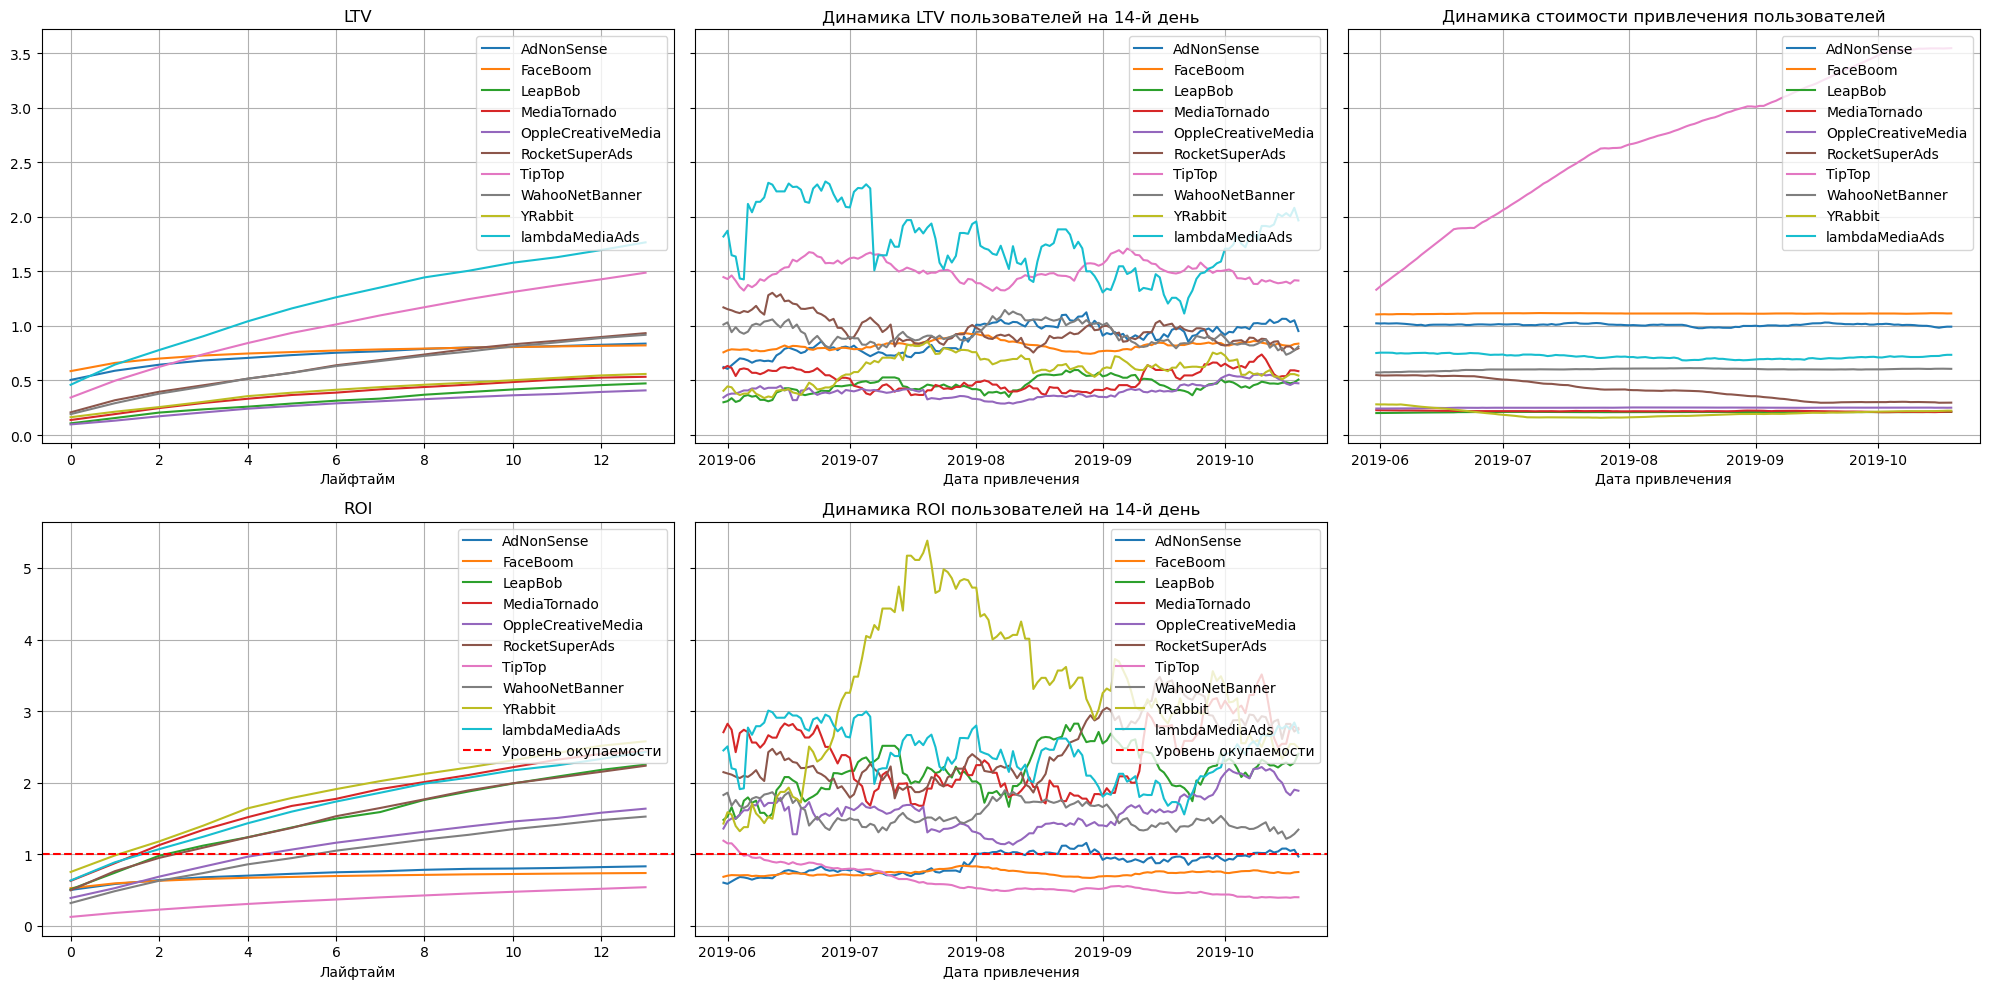

In [42]:
# смотрим окупаемость с разбивкой по рекламным каналам
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, observation_date, horizon_days, dimensions=dimensions
)

# вызовем функцию для построения графиков LTV и ROI
# зададим размер окна для скользящего среднего в 31 день
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=31)

По графикам выше видно, что LTV на 14-ый день всех больше у пользователей, привлечённых из "lambdaMediaAds" и составляет почти 2, самый низкий показатель у пользователей, привлечённых из "OppleCreativeMedia" - почти 0.5. Также LTV пользователей на 14-ый день сильно варьируется в зависимости от когорты определённого дня у каждого рекламного канала. Стоимость привлечения пользователей резко выросла у "TipTop", а у остальных рекламных каналов осталась на одном уровне. ROI на 14-ый день выше 100% у пользователей, привлечённых из каждого рекламного канала, кроме "AdNonSense", "FaceBoom" и "TipTop", т.е рекламная кампания не окупилась только у этих рекламных каналов. Также ROI пользователей на 14-ый день остаётся на одном уровне и выше 100% у всех рекламных каналов, кроме "AdNonSense", "FaceBoom" и "TipTop", рекламная кампания у этих каналов не окупается на протяжении 2019 г.

### Расчёт LTV, CAC и ROI для США и Европы

In [43]:
# смотрим окупаемость с разбивкой по регионам
dimensions = ['region']

# создадим переменные с расчётом LTV и ROI по 'United States'
ltv_raw_usa, ltv_grouped_usa, ltv_history_usa, roi_grouped_usa, roi_history_usa = get_ltv(
    profiles.query('channel != "organic" and region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

In [44]:
# смотрим окупаемость с разбивкой по регионам
dimensions = ['region']

# создадим переменные с расчётом LTV и ROI по всем регионам, кроме 'United States'
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic" and region != "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

In [45]:
def ltv_roi_grouped_europe(ltv_grouped, roi_grouped):
    '''
    создадим функцию для группировки данных по LTV и ROI во всех европейских регионах в единый регион 'Europe'
    '''
    ltv_grouped_europe = ltv_grouped.T # транспонируем таблицу 'ltv_grouped'
    ltv_grouped_europe['Europe'] = ltv_grouped.mean() # посчитаем средние значения LTV во всех европейских регионах
    ltv_grouped_europe['Europe']['cohort_size'] = ltv_grouped_europe.values[0][:-1].sum() # посчитаем кол-во человек в европейской когорте
    ltv_grouped_europe = ltv_grouped_europe.T.query('region == "Europe"') # транспонируем таблицу 'ltv_grouped_europe'
    
    roi_grouped_europe = roi_grouped.T # транспонируем таблицу 'roi_grouped'
    roi_grouped_europe['Europe'] = roi_grouped.mean() # посчитаем средние значения ROI во всех европейских регионах
    roi_grouped_europe['Europe']['cohort_size'] = roi_grouped_europe.values[0][:-1].sum() # посчитаем кол-во человек в европейской когорте
    roi_grouped_europe = roi_grouped_europe.T.query('region == "Europe"') # транспонируем таблицу 'roi_grouped_europe'
    
    return ltv_grouped_europe, roi_grouped_europe

In [46]:
# вызовем функцию 'ltv_roi_grouped_europe'
ltv_grouped_europe, roi_grouped_europe = ltv_roi_grouped_europe(ltv_grouped, roi_grouped)

In [47]:
def ltv_roi_history_europe(ltv_history, roi_history):
    '''
    создадим функцию для группировки данных по динамике LTV и ROI во всех европейских регионах в единый регион 'Europe'
    '''
    ltv_history_europe = ltv_history.T # транспонируем таблицу 'ltv_history'
    # создадим словарь, где ключ - наименование столбца, а значение - функция, которую к нему нужно применить
    dict = {'cohort_size': 'sum'}
    for day in range(horizon_days):
        dict[day] = 'mean'
            
    ltv_history_europe = ltv_history_europe.T.groupby('dt').agg(dict) # транспонируем таблицу и сгруппируем по столбцу 'dt'
    ltv_history_europe['region'] = 'Europe' # добавим столбец с регионом 'Europe'
    ltv_history_europe = ltv_history_europe.groupby(['region','dt']).agg('sum') # сгруппируем таблицу по столбцам 'region' и 'dt'
    
    roi_history_europe = roi_history.T # транспонируем таблицу 'roi_history'
    # создадим словарь, где ключ - наименование столбца, а значение - функция, которую к нему нужно применить
    dict = {'cohort_size': 'sum', 'cac': 'mean'}
    for day in range(horizon_days):
        dict[day] = 'mean'
    
    roi_history_europe = roi_history_europe.T.groupby('dt').agg(dict) # транспонируем таблицу и сгруппируем по столбцу 'dt'
    roi_history_europe['region'] = 'Europe' # добавим столбец с регионом 'Europe'
    roi_history_europe = roi_history_europe.groupby(['region','dt']).agg('sum') # сгруппируем таблицу по столбцам 'region' и 'dt'
    
    return ltv_history_europe, roi_history_europe

In [48]:
# вызовем функцию 'ltv_roi_history_europe'
ltv_history_europe, roi_history_europe = ltv_roi_history_europe(ltv_history, roi_history)

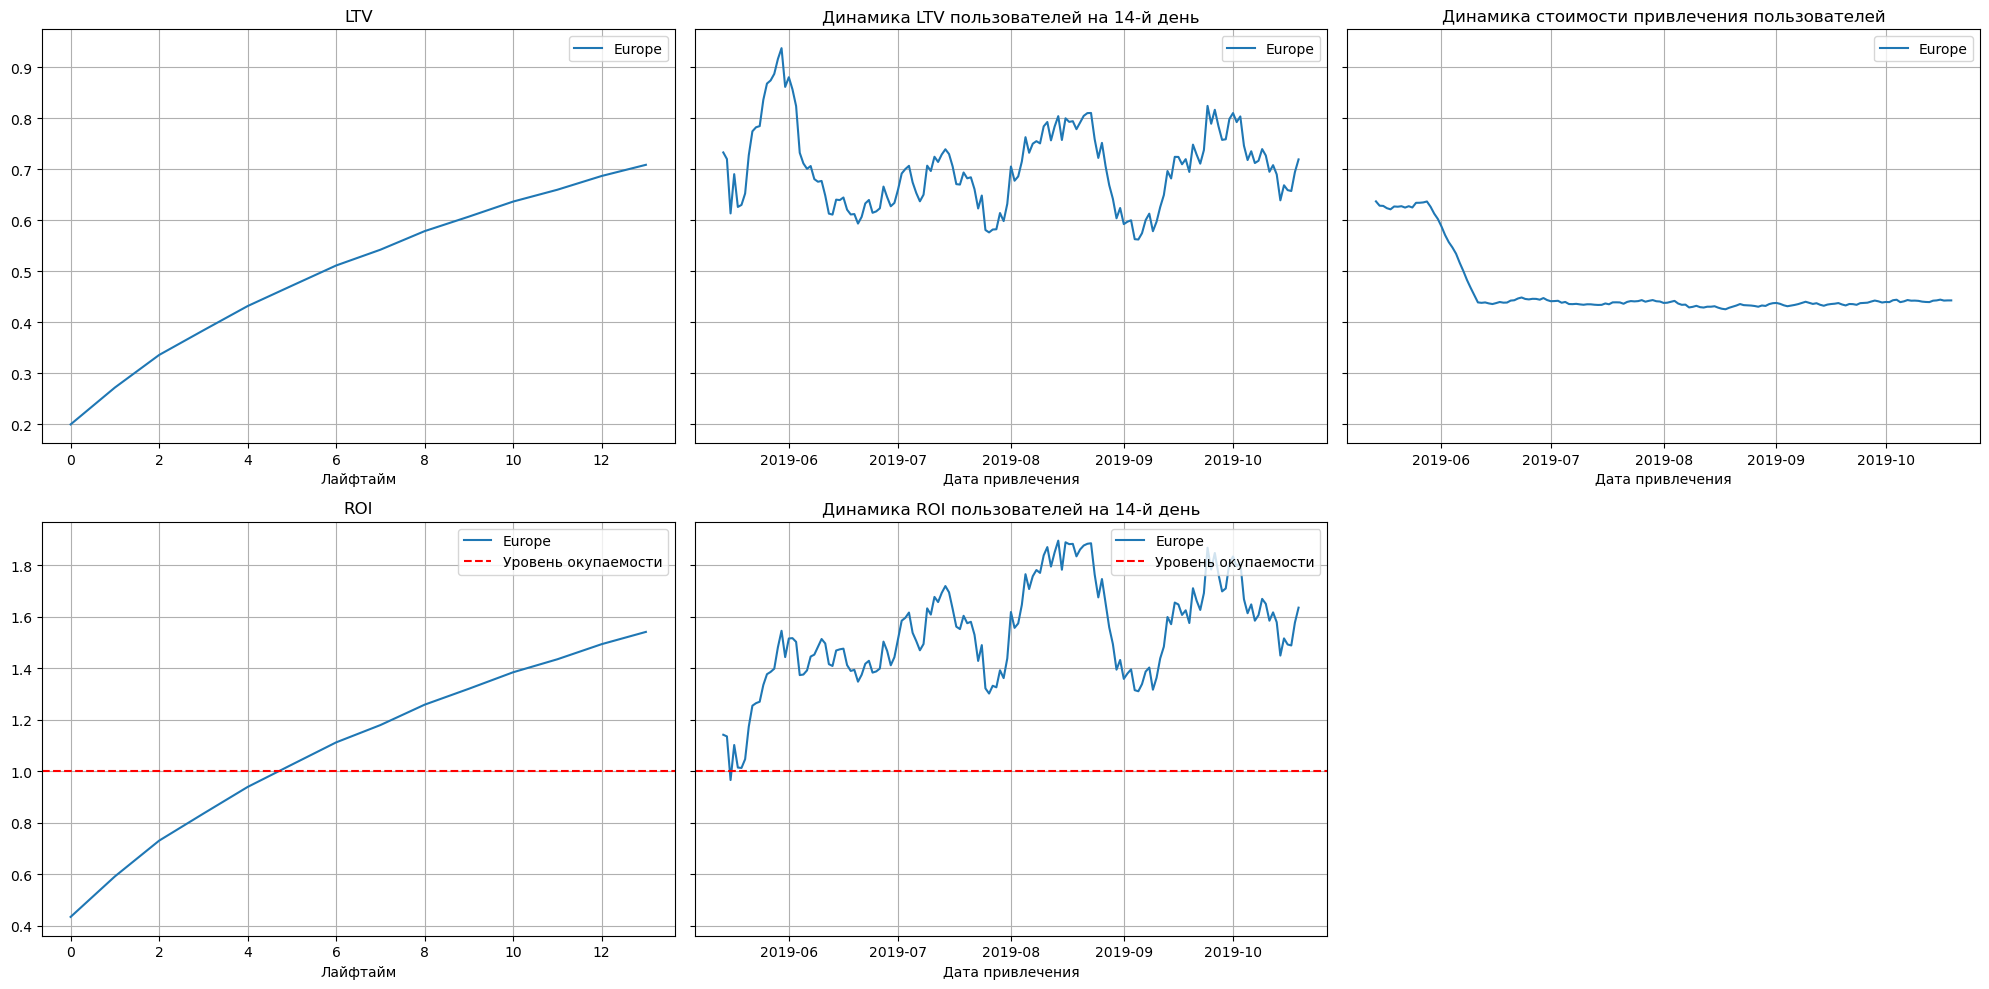

In [49]:
# вызовем функцию для построения графиков LTV и ROI по региону 'Europe'
# зададим размер окна для скользящего среднего в 14 дней
plot_ltv_roi(ltv_grouped_europe, ltv_history_europe, roi_grouped_europe, roi_history_europe, horizon_days, window=14)

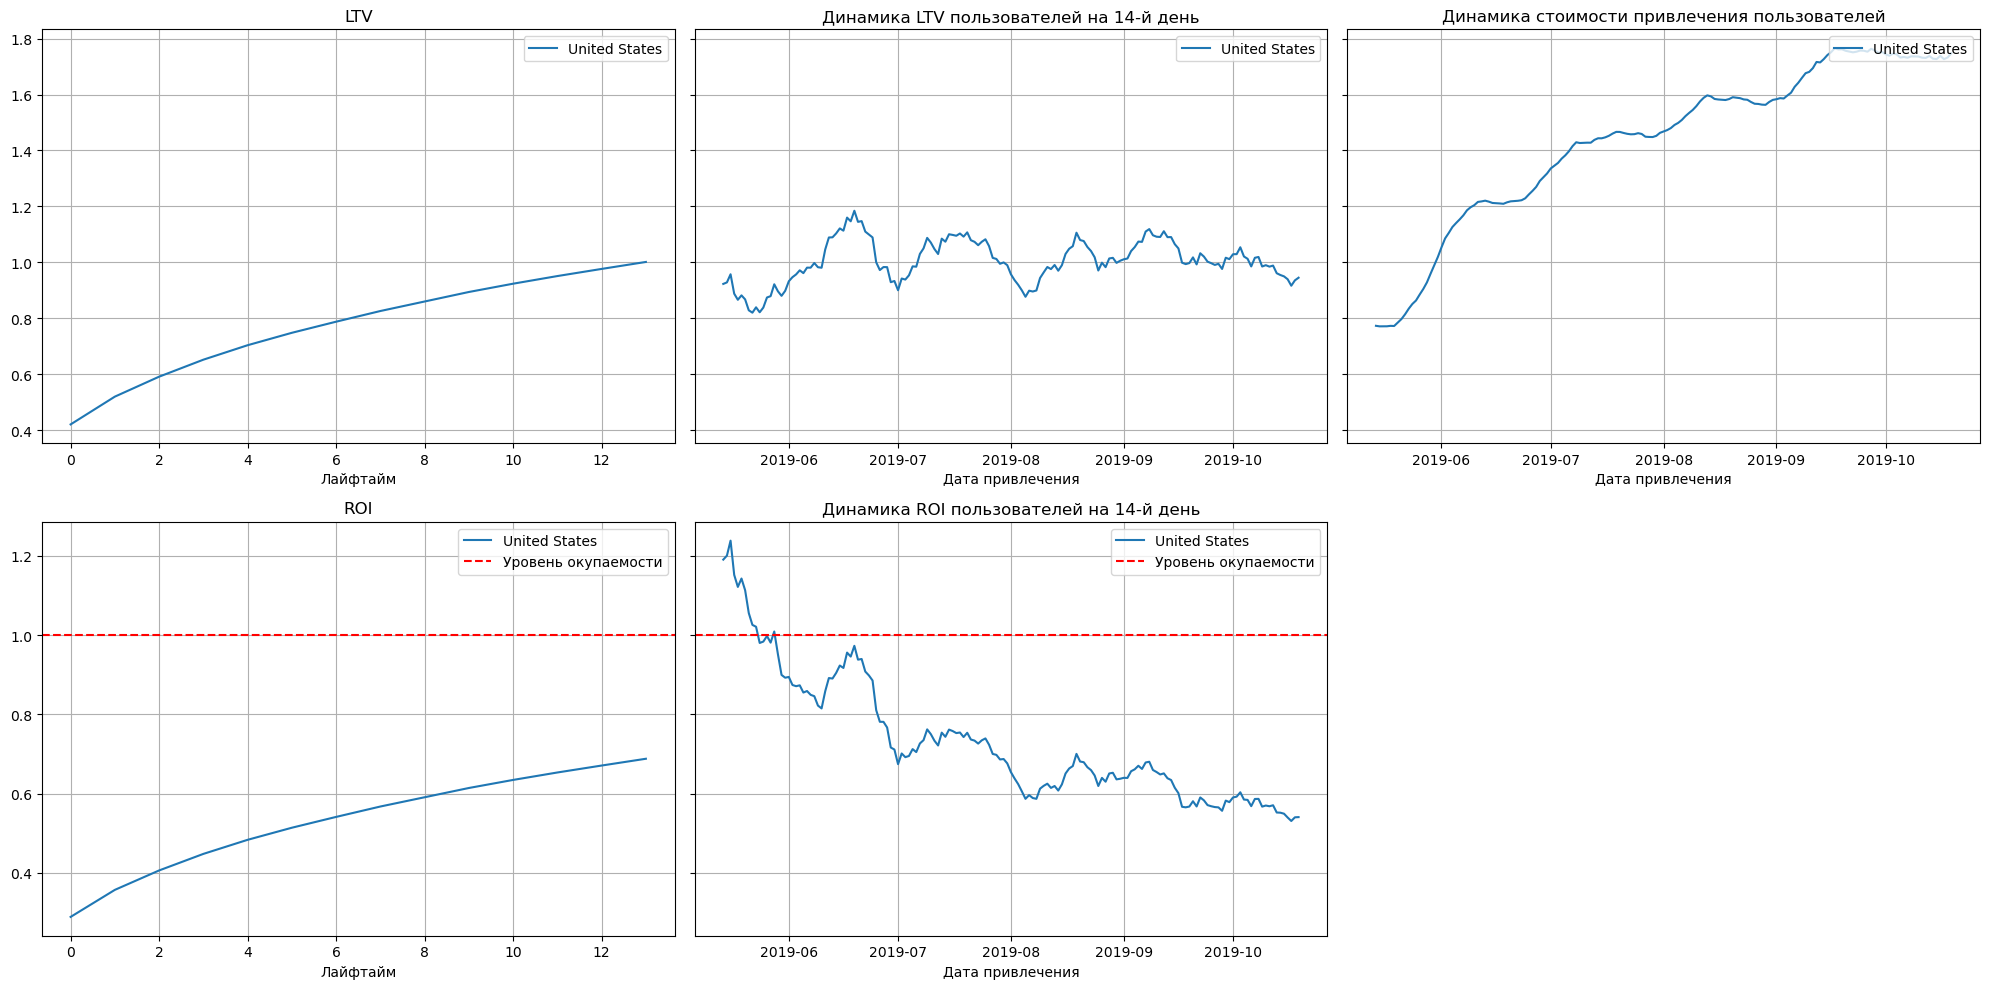

In [50]:
# вызовем функцию для построения графиков LTV и ROI по региону 'United States'
# зададим размер окна для скользящего среднего в 14 дней
plot_ltv_roi(ltv_grouped_usa, ltv_history_usa, roi_grouped_usa, roi_history_usa, horizon_days, window=14)

По графикам выше видно, что LTV на 14-ый день больше у пользователей из "United States". Также LTV пользователей на 14-ый день сильно варьируется в зависимости от когорты определённого дня у каждого региона. Стоимость привлечения пользователей резко выросла в "United States", а в "Europe" снизилась. ROI на 14-ый день выше 100% у пользователей из "Europe" - рекламная кампания окупилась, а в "United States" - нет. Также ROI пользователей на 14-ый день остаётся на одном уровне и выше 100% в "Europe", а в "United States" рекламная кампания перестаёт окупаться в конце мая 2019 г.

# Вывод

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Было проведено исследование развлекательного приложения "Procrastinate Pro+" за несколько месяцев 2019 г. с целью выявления эффективности маркетинговой деятельности.
<br>Заказчик — компания, владеющая приложением "Procrastinate Pro+".
<br>Входные данные от компании — лог сервера с данными об посещениях пользователей, выгрузка пользовательских покупок и рекламные расходы.
<br>Во время исследования были выявлены следующие проблемы в данных: неверные типы данных. Неверные типы данных исправлены на корректные.
<br>При дальнейшей работе с данными заказчику стоит проводить предобработку данных, т.е. выявлять и устранять или предотвращать неверные типы данных.

<br>В качестве причин неэффективности привлечения пользователей, можно выделить следующие:
1. Конверсия пользователей из неплатящих в платящих на 14-ый день довольно низкая и составляет 8%. Также конверсия нестабильна и зависит от когорты определённого дня.
2. Если изучить конверсию пользователей на 14-ый день по регионам, то во всех регионах кроме "United States" она крайне низкая и составляет 5%.
3. Конверсия пользователей на 14-ый день сильно варьируется в зависимости от рекламных каналов
4. Удержание платящих пользователей на 14-ый день составляет довольно низкие 10%
5. Удержание в регионе "United States" меньше, чем в остальных регионах
6. Удержание у рекламных каналов "AdNonSense" и "FaceBoom" сильно меньше, чем у остальных каналов
7. В целом стоимость привлечения пользователей стремительно растёт
8. Если изучить стоимость привлечения пользователей по регионам, то она растёт только в "United States"
9. Если изучить стоимость привлечения пользователей по рекламным каналам, то она растёт только в "TipTop"
10. В целом ROI на 14-ый день ниже 100%, это значит, что рекламная кампания не окупается
11. Если изучить ROI на 14-ый день по устройствам, то рекламная кампания не окупается только на "PC"
12. Если изучить ROI на 14-ый день по регионам, то рекламная кампания не окупается только в "United States"

<br>В результате исследования сформулированы следующие рекомендации отделу маркетинга:
1. Обратить внимание на рекламную кампанию в "United States". Изучить причины более высокой конверсии в этом регионе
2. Использовать рекламные каналы с самой высокой конверсией, например "FaceBoom", "AdNonSense", "lambdaMediaAds". Избавиться от рекламных каналов с низкой конверсией, например "OppleCreativeMedia"
3. Обратить внимание на низкий показатель удержания платящих и неплатящих пользователей
4. Выявить причины резкого роста стоимости привлечения пользователей в "United States"
5. Перестать использовать такие рекламные каналы как "TipTop", "FaceBoom", "AdNonSense", так как у них ROI на 14-ый день ниже 100%